In [100]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [101]:
with open('data/train.csv') as f:
    clean_file = [line for line in map(lambda s: s.strip().replace('"', ''), f.readlines()) if line != '']

with open('data/train_clean.csv', 'w') as f:
    f.write('\n'.join(clean_file))

In [102]:
train = pd.read_csv('data/train_clean.csv')

In [103]:
train.shape

(26884, 25)

The dataset has 26884 rows and 25 columns

In [104]:
train.columns

Index(['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BIRTH_DATE',
       'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC', 'PAY_AMT_NOV',
       'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'DEFAULT PAYMENT JAN'],
      dtype='object')

Columns:
- CUST_COD : customer code
- LIMIT_BAL : Amount of credit card given to the client
- SEX : gender
- EDUCATION : education level
- MARRIAGE : marital status
- BIRTH_DATE : birthdate
- PAY_DEC, PAY_NOV, PAY_OCT, PAY_SEP, PAY_AUG, PAY_JUL : history of payments. 1 = 1 month delay, 2 = 2 months delay...
- BILL_AMT_DEC, BILL_AMT_NOV, BILL_AMT_OCT, BILL_AMT_SEP, BILL_AMT_AUG, BILL_AMT_JUL : amount of bill statement per month
- PAY_AMT_DEC, PAY_AMT_NOV, PAY_AMT_OCT, PAY_AMT_SEP, PAY_AMT_AUG, PAY_AMT_JUL : amount of payment per month
- DEFAULT PAYMENT JAN : default payment on January 1 = yes, 0 = no

# LIMIT_BAL

In [105]:
train['LIMIT_BAL'].describe()

count    26884.00000
mean      4997.91411
std       3879.73624
min        298.13600
25%       1490.68000
50%       4173.90400
75%       7155.26400
max      29813.60000
Name: LIMIT_BAL, dtype: float64

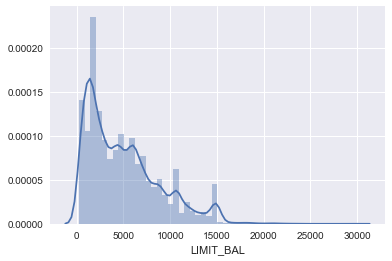

In [106]:
sns.distplot(train['LIMIT_BAL'])

In [107]:
print("Number of null values: {0}".format(train['LIMIT_BAL'].isnull().sum()))

Number of null values: 0


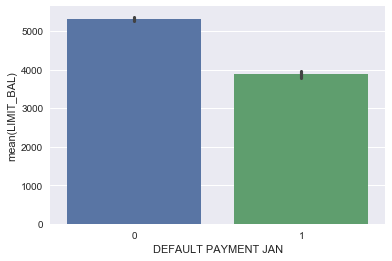

In [108]:
sns.barplot(x='DEFAULT PAYMENT JAN', y='LIMIT_BAL', data=train)

If the balance is higher, there is lower probability to default. That seems reasonable

# SEX

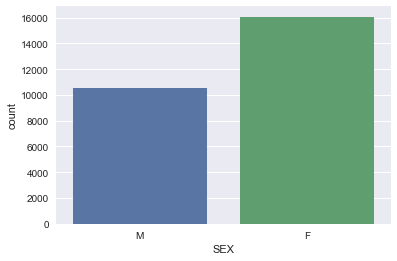

In [109]:
sns.countplot(x='SEX', data=train)

There are more females than males

In [110]:
males = (train['SEX'] == 'M').sum()
females = (train['SEX'] == 'F').sum()
sex_nulls = (train['SEX'].isnull()).sum()

print("Number of males: {0}".format(males))
print("Number of females: {0}".format(females))
print("Number of nulls: {0}".format(sex_nulls))

print("\nSum: {0} / {1}".format(males + females + sex_nulls, len(train)))

Number of males: 10555
Number of females: 16071
Number of nulls: 258

Sum: 26884 / 26884


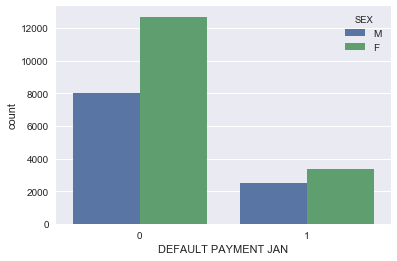

In [111]:
sns.countplot(x='DEFAULT PAYMENT JAN', hue='SEX', data=train)

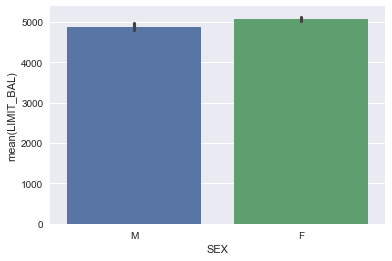

In [112]:
sns.barplot(x = 'SEX', y = 'LIMIT_BAL', data=train)

Males and females have quite the same initial balance

In [113]:
pd.crosstab(train['SEX'], train['DEFAULT PAYMENT JAN'], normalize=0)

DEFAULT PAYMENT JAN,0,1
SEX,,
F,0.790119,0.209881
M,0.761440,0.238560


Females have ~21% probability to default, while males have a slightly higher probability to default (~24%)

# EDUCATION

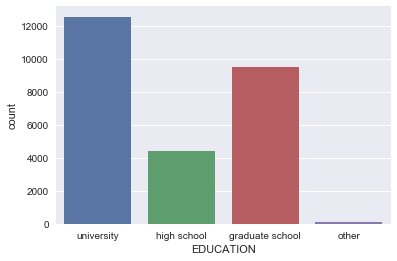

In [114]:
sns.countplot(x='EDUCATION', data=train)

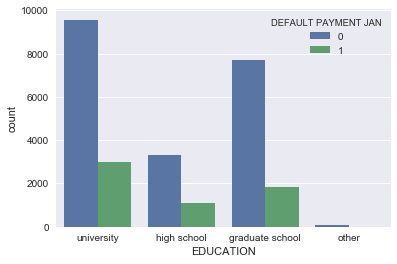

In [115]:
sns.countplot(x = 'EDUCATION', hue='DEFAULT PAYMENT JAN', data=train)